In [19]:
#!pip install yfinance
#!pip install pandas_datareader

### Импорт библиотек и подготовка датасета

In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

from datetime import datetime

tech_list = ["AAPL", "GOOG", "MSFT", "AMZN"]

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [21]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-03-14,151.449997,154.119995,150.100006,150.619995,148.918167,108732100,APPLE
2022-03-15,150.899994,155.570007,150.380005,155.089996,153.337692,92964300,APPLE
2022-03-16,157.050003,160.000000,154.460007,159.589996,157.786850,102300200,APPLE
2022-03-17,158.610001,161.000000,157.630005,160.619995,158.805206,75615400,APPLE
2022-03-18,160.509995,164.479996,159.759995,163.979996,162.127258,123511700,APPLE


In [22]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-03-07,174.830002,177.990005,173.720001,176.820007,176.820007,34063300,AMAZON
2024-03-08,176.440002,178.789993,174.330002,175.350006,175.350006,37853500,AMAZON
2024-03-11,174.309998,174.470001,171.470001,171.960007,171.960007,28484800,AMAZON
2024-03-12,173.500000,176.759995,171.979996,175.389999,175.389999,36610600,AMAZON
2024-03-13,175.899994,177.619995,175.550003,176.559998,176.559998,30737500,AMAZON


### Описательная статистика

In [23]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,503.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,165.040040,166.831690,163.432008,165.235209,164.339928,7.013260e+07
std,18.711344,18.384046,18.934884,18.667672,18.949014,2.417102e+07
min,126.010002,127.769997,124.169998,125.019997,124.166641,2.404830e+07
25%,148.884995,150.930000,147.264999,149.375000,148.143021,5.244710e+07
50%,166.600006,168.559998,165.500000,166.649994,165.508591,6.555130e+07
75%,180.379997,182.079994,178.440002,180.640007,180.048981,8.144755e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.826020e+08


In [24]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2022-03-14 to 2024-03-13
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          503 non-null    float64
 1   High          503 non-null    float64
 2   Low           503 non-null    float64
 3   Close         503 non-null    float64
 4   Adj Close     503 non-null    float64
 5   Volume        503 non-null    int64  
 6   company_name  503 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.4+ KB


### Данные на момент закрытия биржи

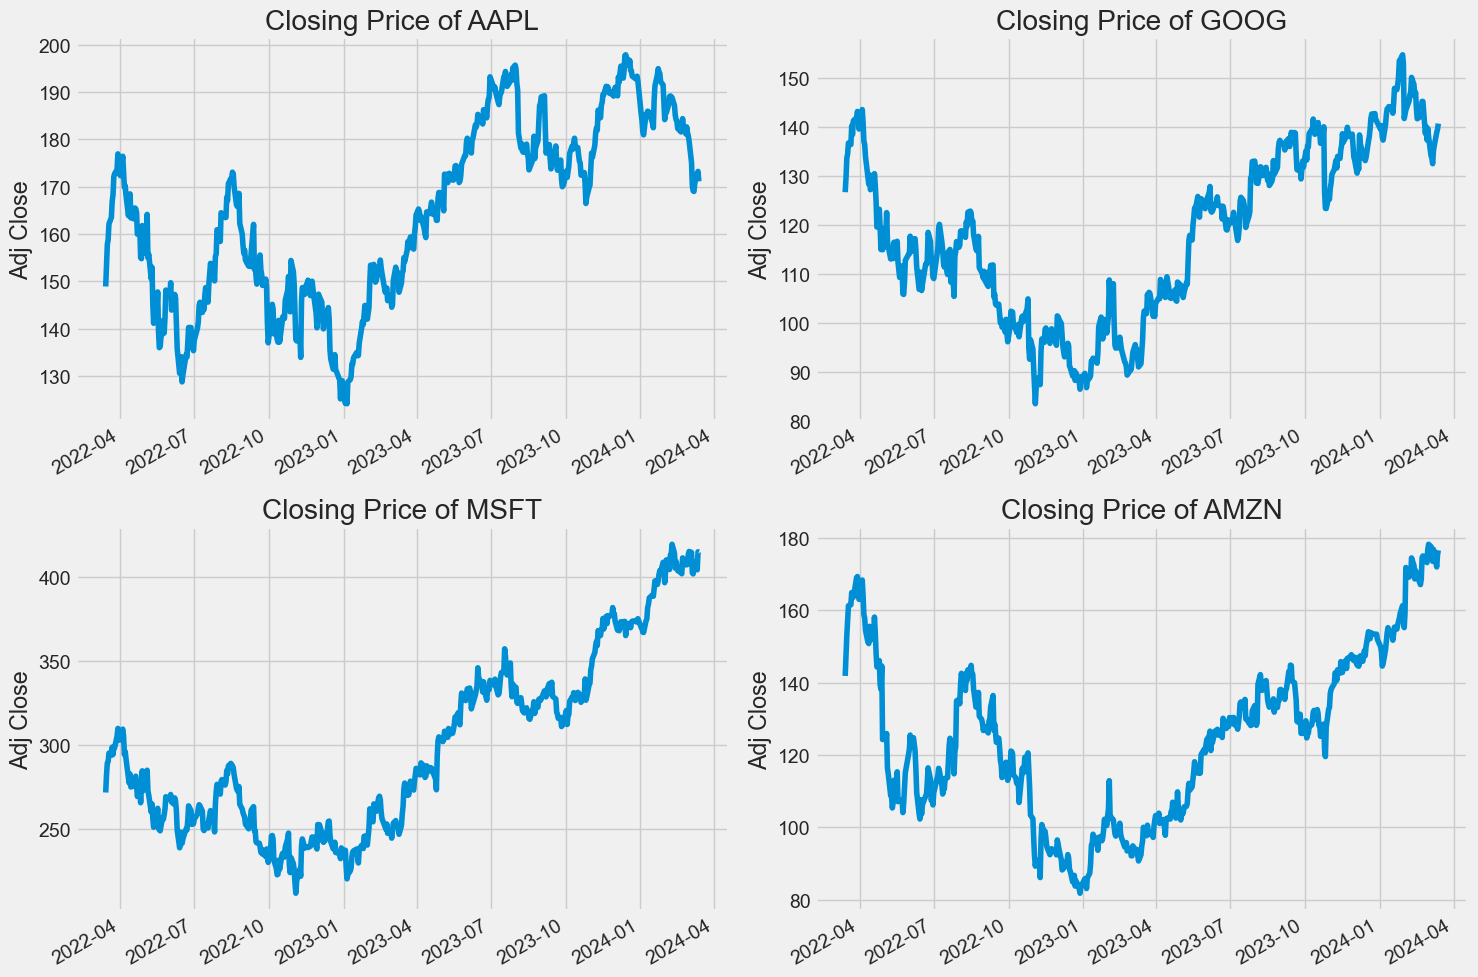

In [25]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company["Adj Close"].plot()
    plt.ylabel("Adj Close")
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i-1]}")

plt.tight_layout()

### Данные об объеме торгов

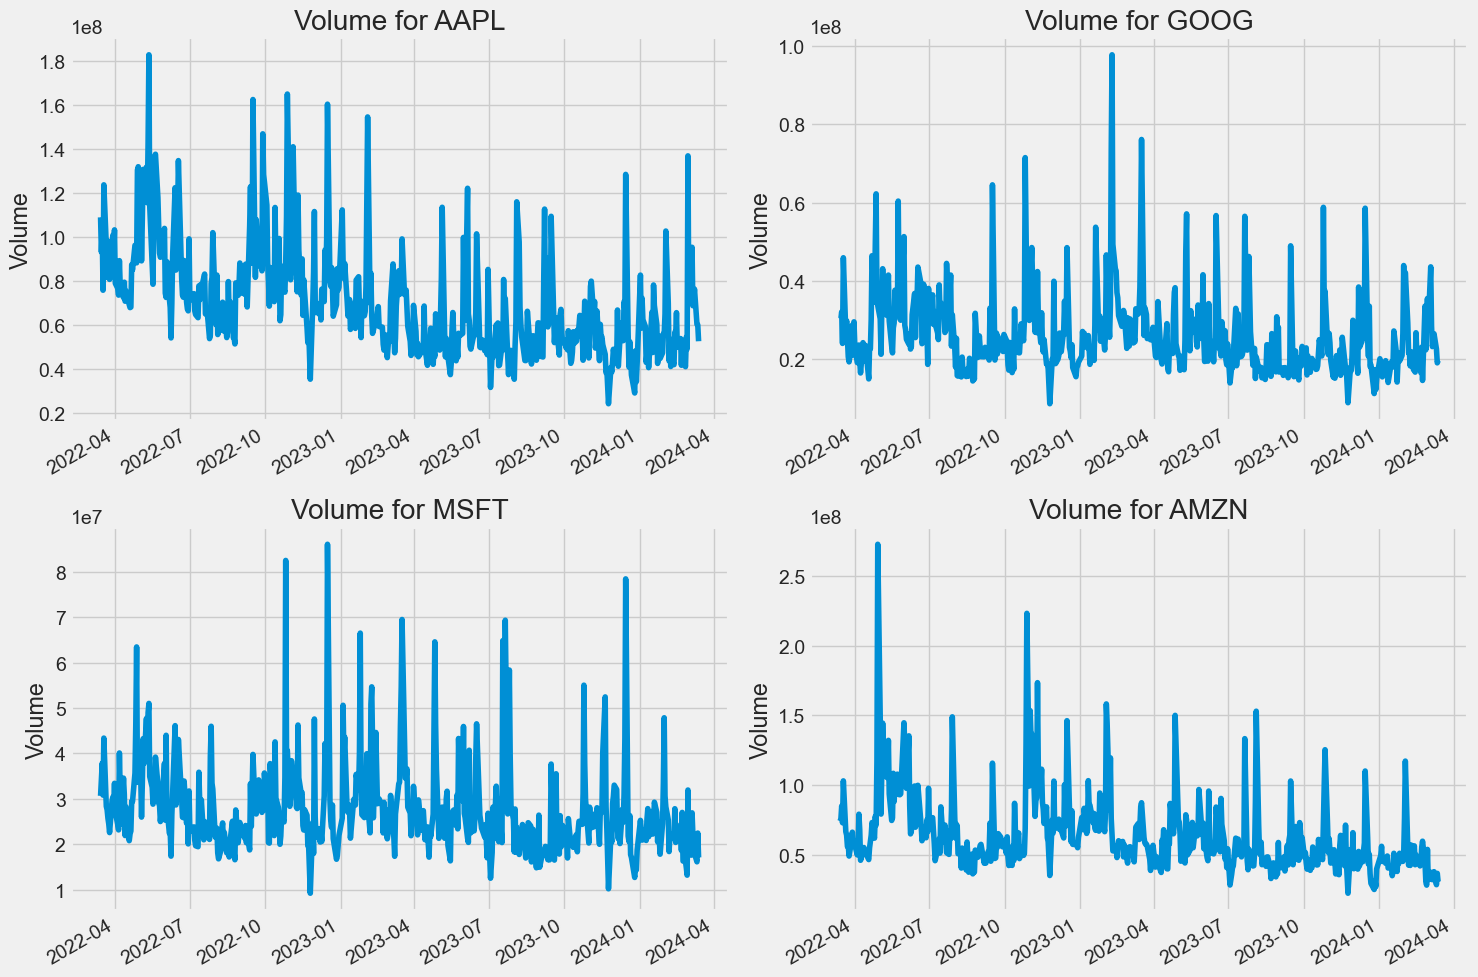

In [26]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company["Volume"].plot()
    plt.ylabel("Volume")
    plt.xlabel(None)
    plt.title(f"Volume for {tech_list[i-1]}")

plt.tight_layout()

### Модель MA (moving average) скользящее среднее

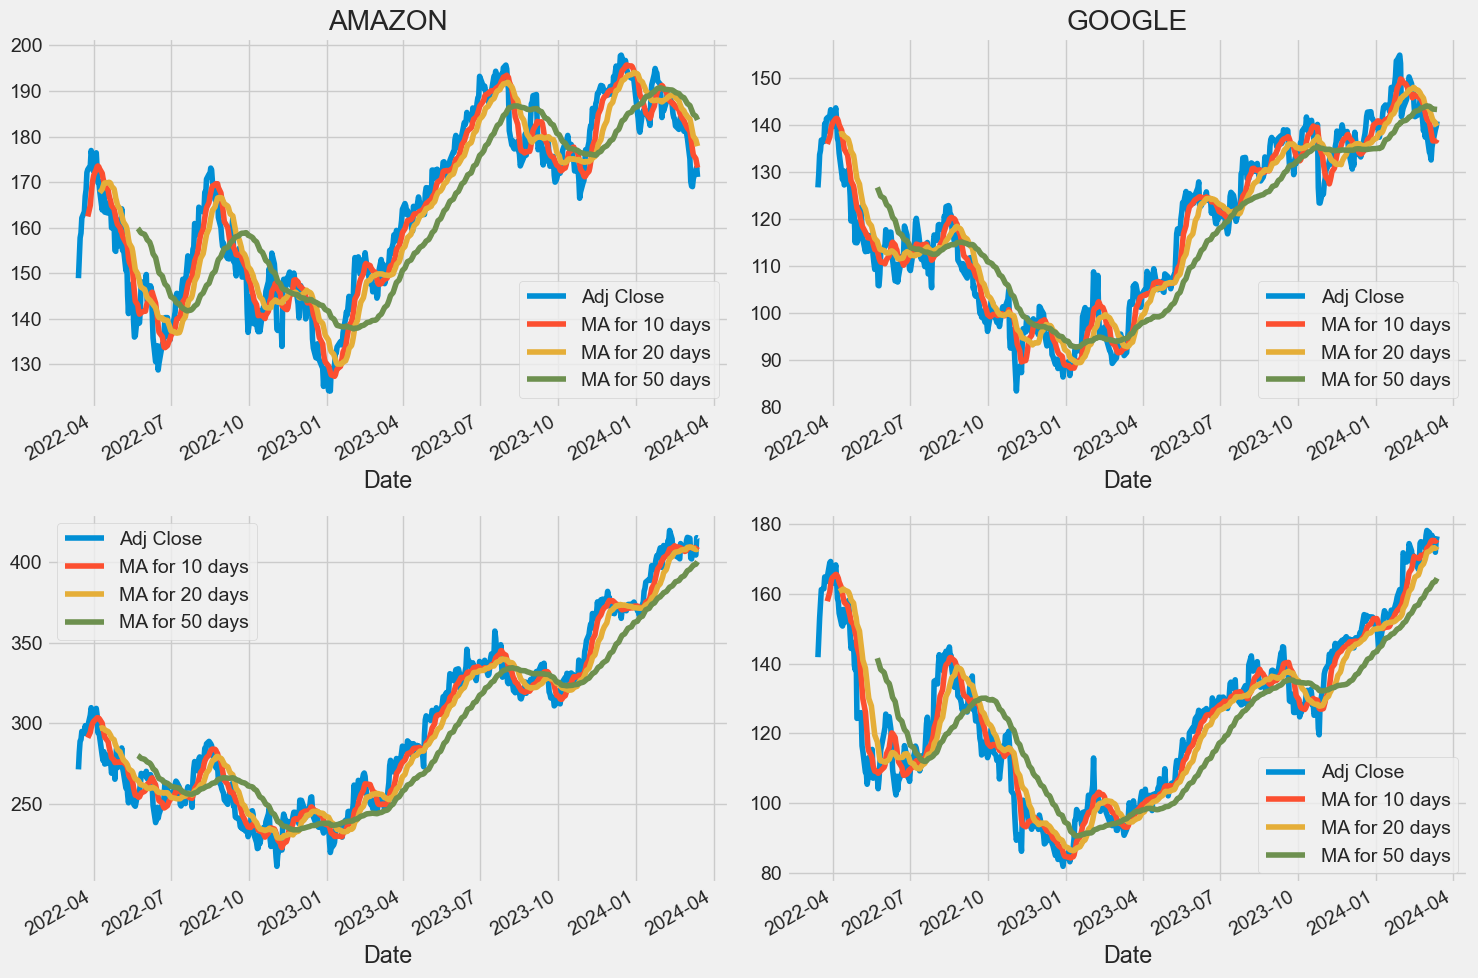

In [28]:
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company["Adj Close"].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[["Adj Close", "MA for 10 days", "MA for 20 days", "MA for 50 days"]].plot(ax=axes[0,0])
axes[0,0].set_title("APPLE")

GOOG[["Adj Close", "MA for 10 days", "MA for 20 days", "MA for 50 days"]].plot(ax=axes[0,1])
axes[0,1].set_title("GOOGLE")

MSFT[["Adj Close", "MA for 10 days", "MA for 20 days", "MA for 50 days"]].plot(ax=axes[1,0])
axes[0,0].set_title("MICROSOFT")

AMZN[["Adj Close", "MA for 10 days", "MA for 20 days", "MA for 50 days"]].plot(ax=axes[1,1])
axes[0,0].set_title("AMAZON")

fig.tight_layout()

### Дневные изменения

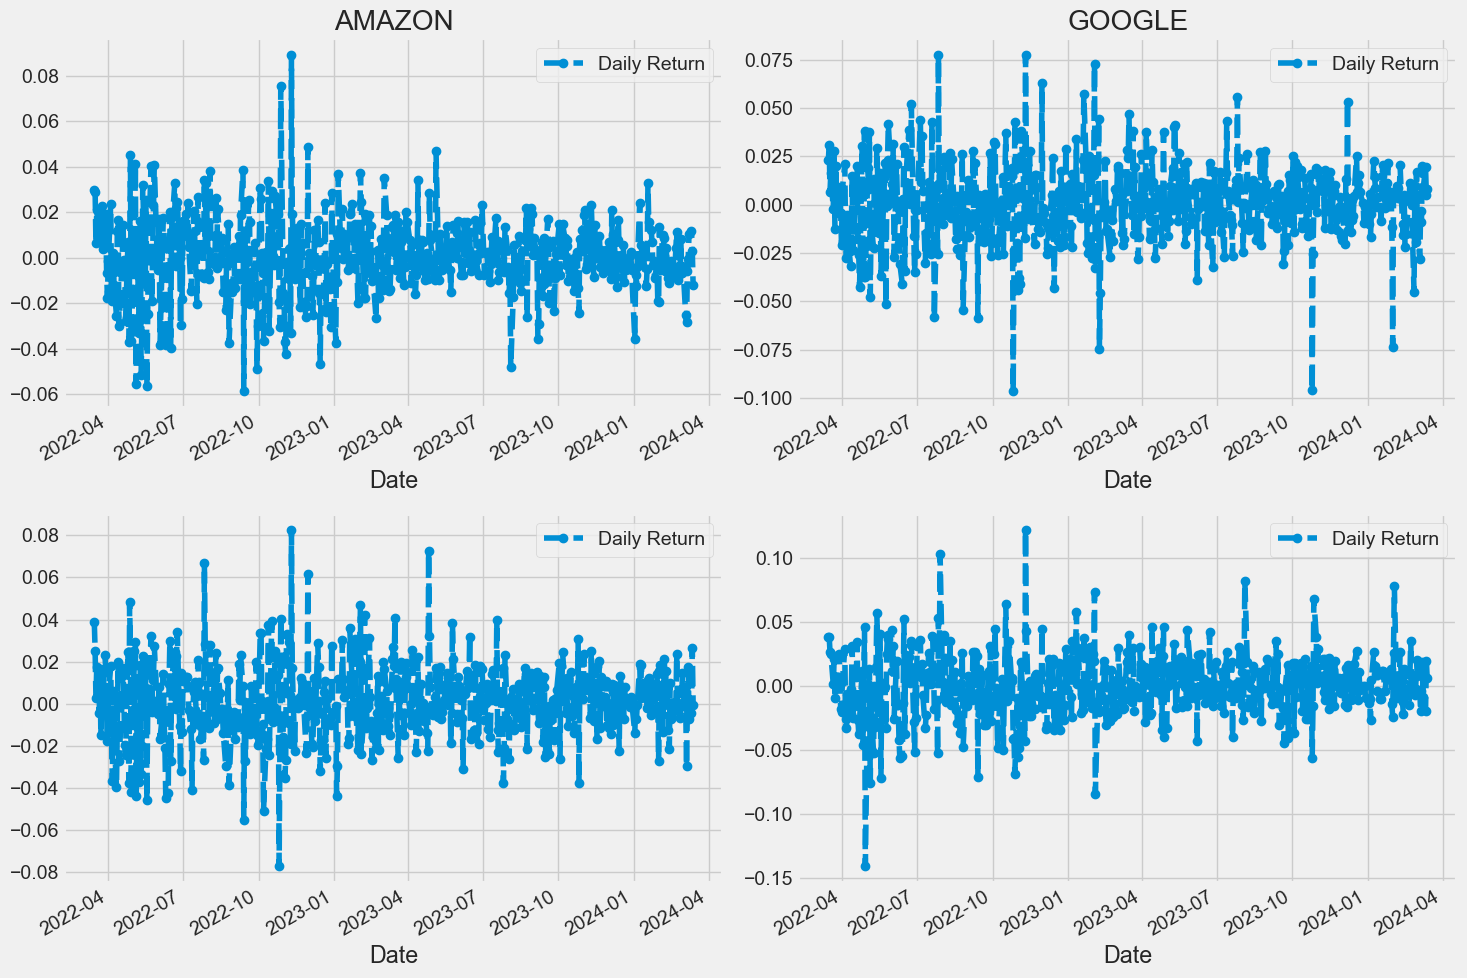

In [31]:
for company in company_list:
    company["Daily Return"] = company["Adj Close"].pct_change()

fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL["Daily Return"].plot(ax=axes[0,0], legend=True, linestyle="--", marker="o")
axes[0,0].set_title("APPLE")

GOOG["Daily Return"].plot(ax=axes[0,1], legend=True, linestyle="--", marker="o")
axes[0,1].set_title("GOOGLE")

MSFT["Daily Return"].plot(ax=axes[1,0], legend=True, linestyle="--", marker="o")
axes[0,0].set_title("MICROSOFT")

AMZN["Daily Return"].plot(ax=axes[1,1], legend=True, linestyle="--", marker="o")
axes[0,0].set_title("AMAZON")

fig.tight_layout()


/var/folders/24/z61d72zx27z5ml8twybhwmm40000gn/T/ipykernel_98645/3490421317.py:10: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


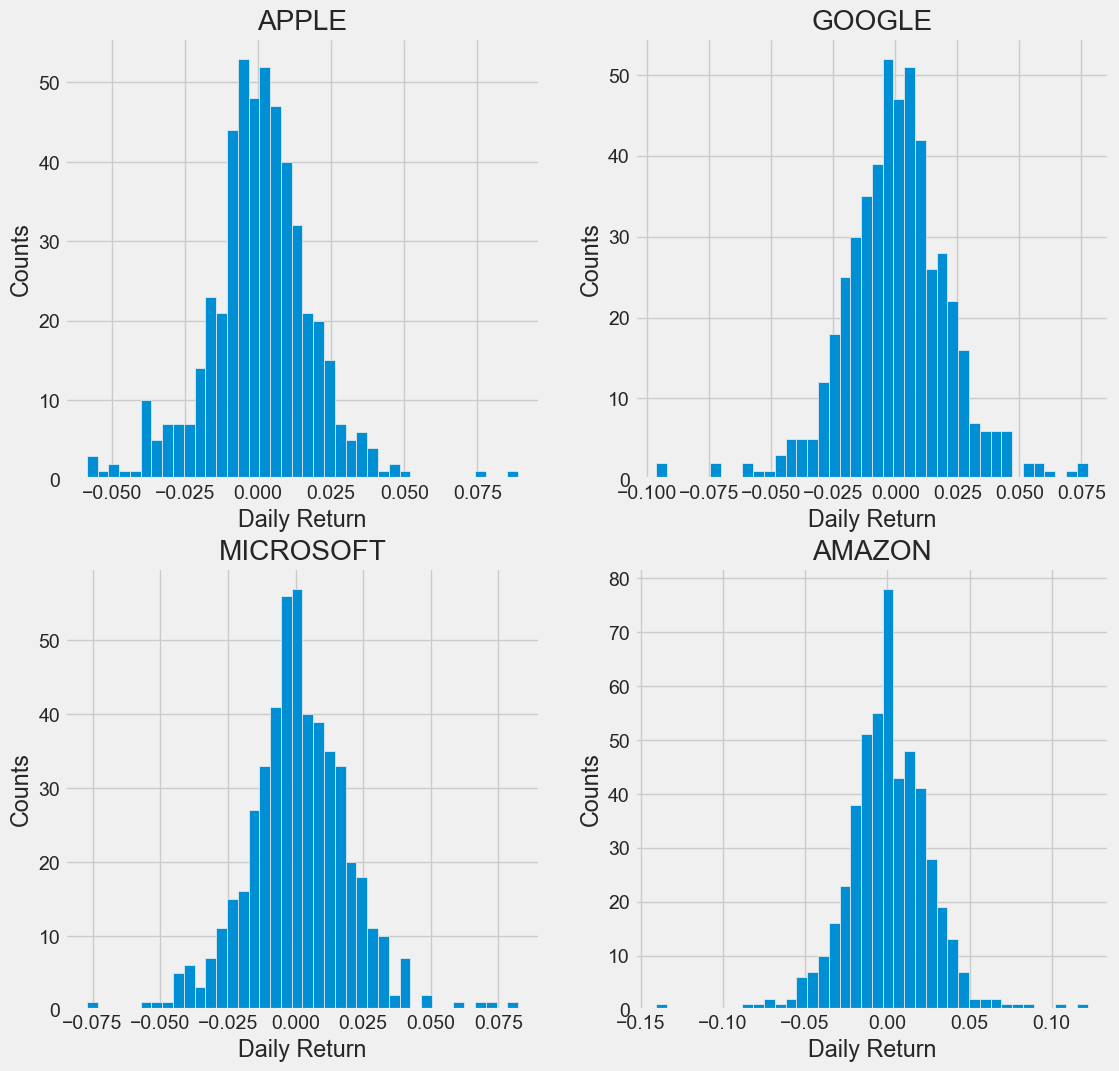

In [36]:
plt.figure(figsize=(12,12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company["Daily Return"].hist(bins=40)
    plt.xlabel("Daily Return")
    plt.ylabel("Counts")
    plt.title(f"{company_name[i-1]}")

fig.tight_layout()


### Корреляция стоимости акций

In [37]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)["Adj Close"]

tech_rets = closing_df.pct_change()
tech_rets.head(10)

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-03-14,NaN,NaN,NaN,NaN
2022-03-15,0.029677,0.038868,0.023035,0.038743
2022-03-16,0.029015,0.038934,0.031081,0.025213
2022-03-17,0.006454,0.027008,0.006807,0.002819
2022-03-18,0.020919,0.025512,0.016352,0.017648
2022-03-21,0.008538,0.001495,-0.002361,-0.004227
2022-03-22,0.020800,0.021038,0.027836,0.016379
2022-03-23,0.008234,-0.008982,-0.012646,-0.015030
2022-03-24,0.022678,0.001478,0.020277,0.015393


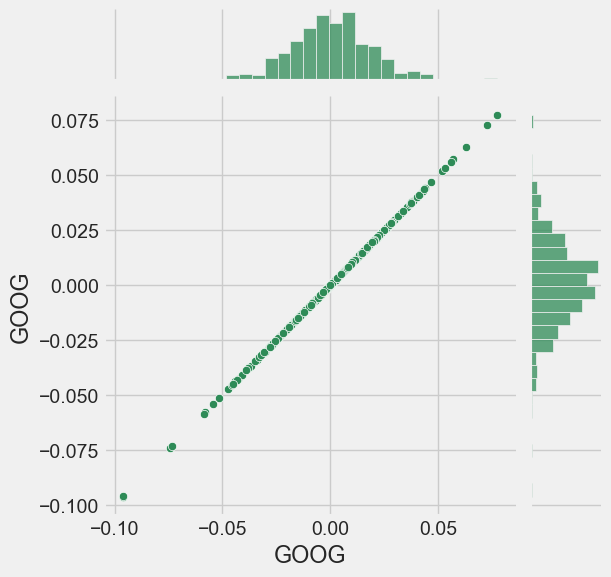

In [39]:
sns.jointplot(x="GOOG", y="GOOG", data=tech_rets, kind="scatter", color="seagreen")

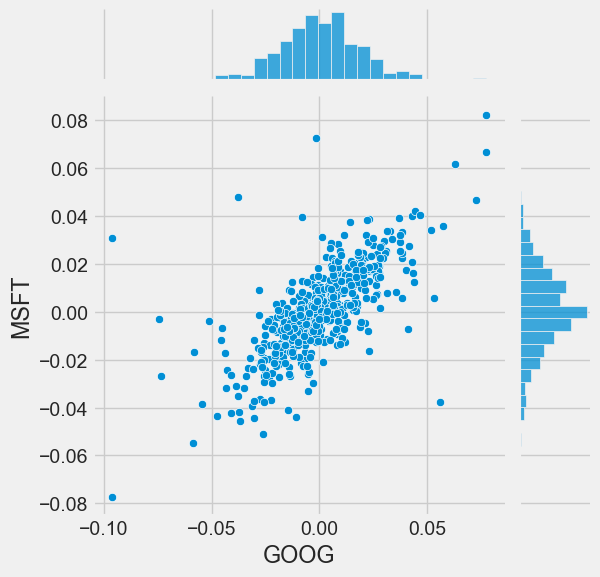

In [40]:
sns.jointplot(x="GOOG", y="MSFT", data=tech_rets, kind="scatter")

/Library/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


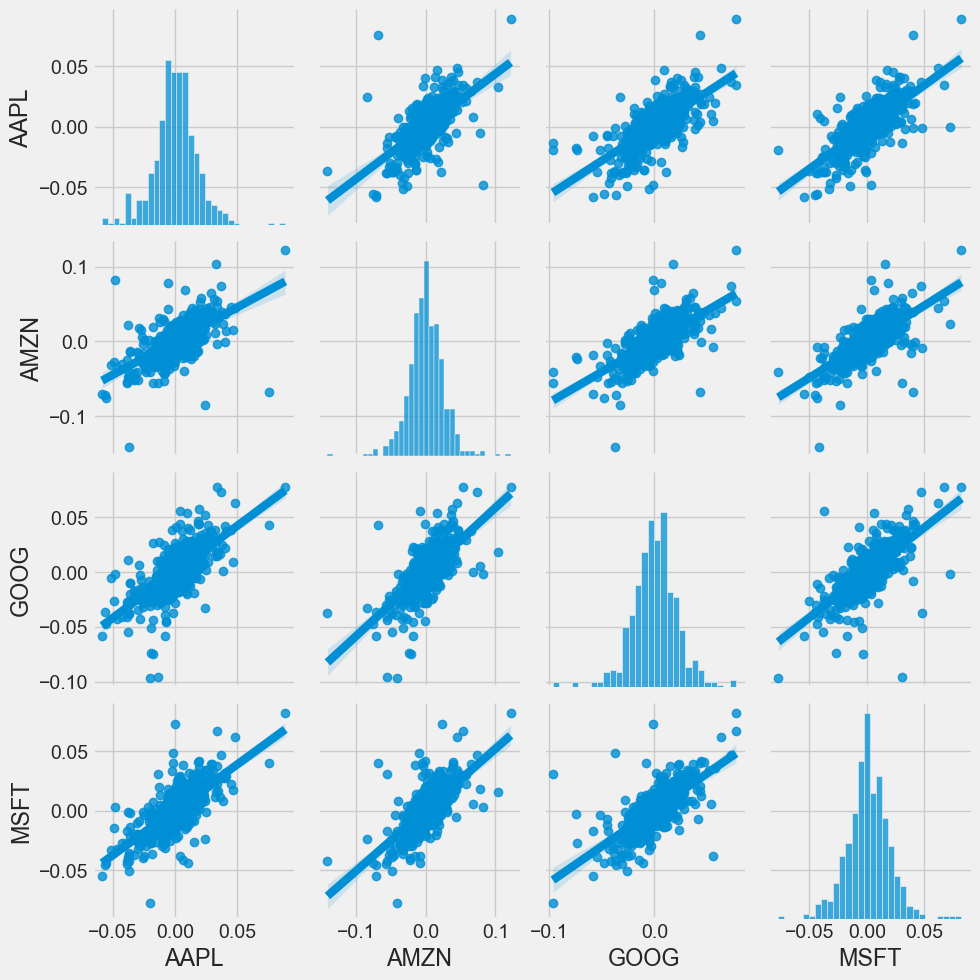

In [41]:
sns.pairplot(tech_rets, kind="reg")

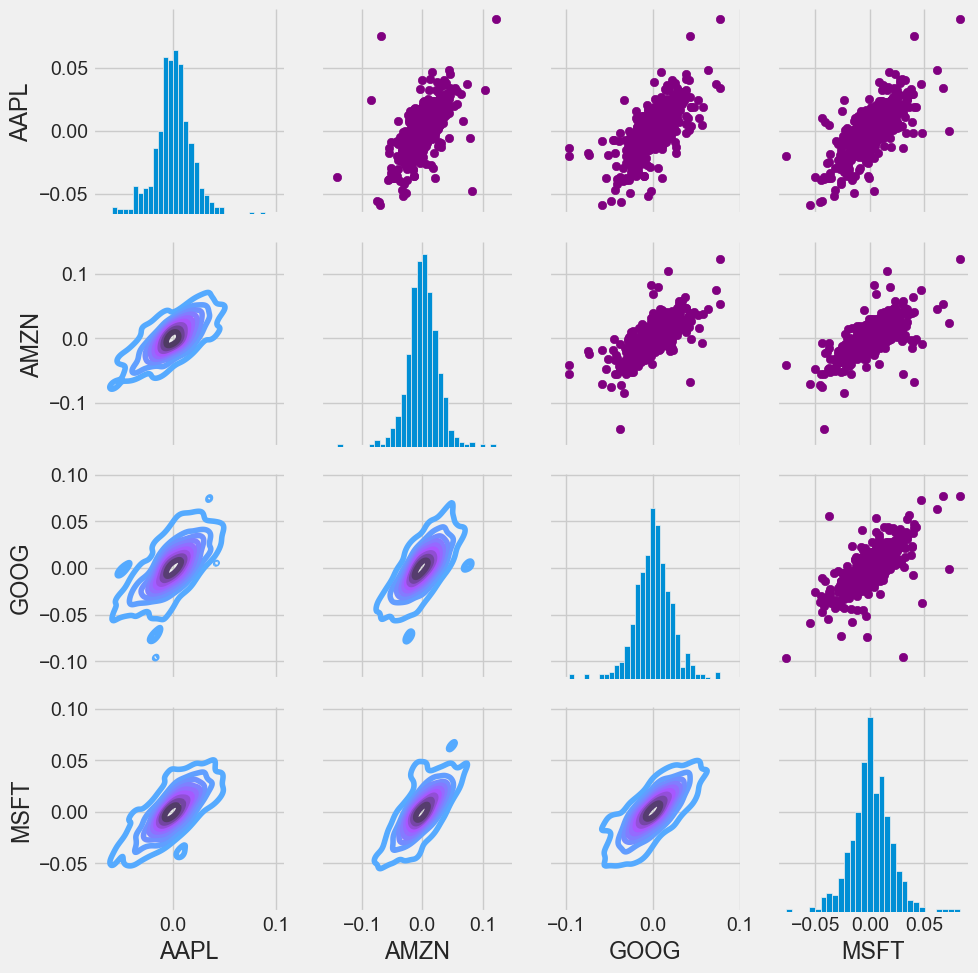

In [43]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color="purple")
return_fig.map_lower(sns.kdeplot, cmap="cool_d")

return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

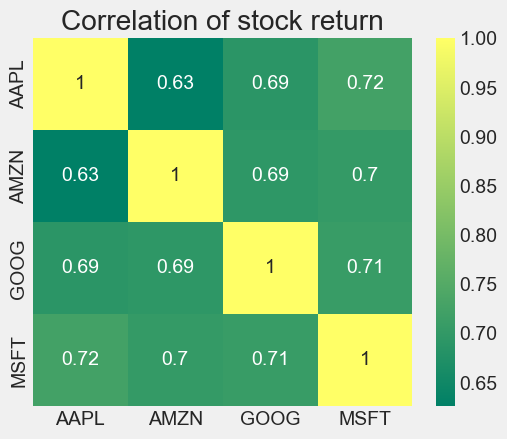

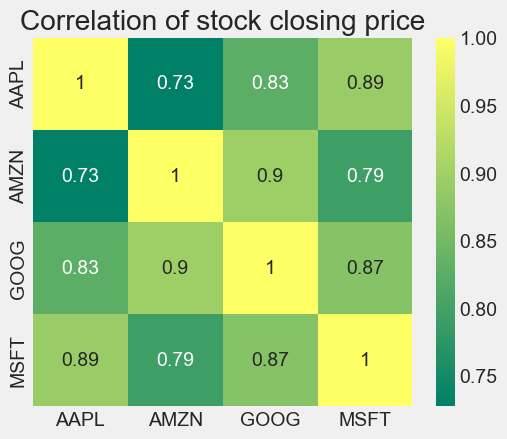

In [44]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(), annot=True, cmap="summer")
plt.title("Correlation of stock return")

plt.figure(figsize=(12,10))
plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(), annot=True, cmap="summer")
plt.title("Correlation of stock closing price")

### Предсказание данных цены закрытия для компании Apple

In [45]:
df = pdr.get_data_yahoo("AAPL", start = "2012-01-01", end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433825,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500648,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639427,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771560,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751298,394024400
...,...,...,...,...,...,...
2024-03-08,169.000000,173.699997,168.940002,170.729996,170.729996,76114600
2024-03-11,172.940002,174.380005,172.050003,172.750000,172.750000,60139500
2024-03-12,173.149994,174.029999,171.009995,173.229996,173.229996,59825400


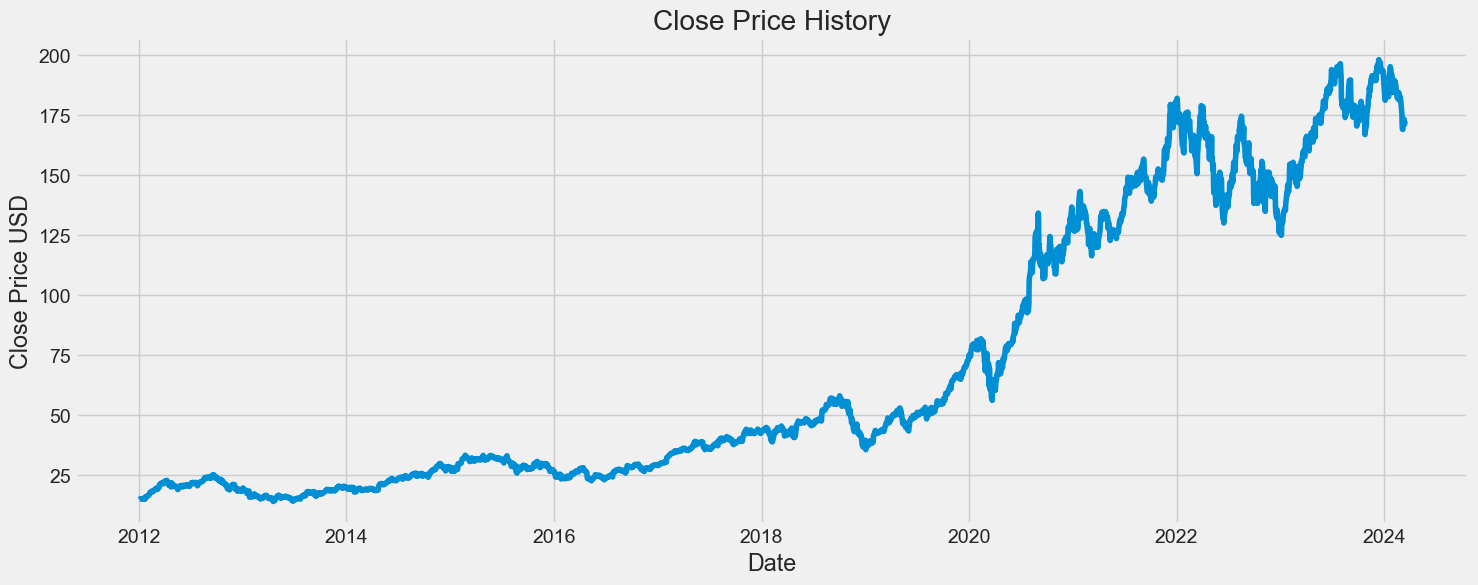

In [46]:
plt.figure(figsize=(16,6))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel("Date")
plt.ylabel("Close Price USD")
plt.show()

In [47]:
data = df.filter(["Close"])
dataset = data.values
training_data_len = int(np.ceil(len(dataset)*0.95))
training_data_len

2916

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.86490189],
       [0.85349897],
       [0.8615896 ]])

In [50]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]
[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00

In [51]:
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

### Предсказание с использованием LSTM